### Factors Driving Life Expectancy : Do immunization matters?

### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


import os

from library.sb_utils import save_file

In [2]:
sns.set()
sns.set_context("notebook")

### Importing Data

In [3]:
df1 = pd.read_csv("../data/life_exp_clean.csv")

In [4]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,population
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,17.334091
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,12.699494


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   Alcohol                          2735 non-null   float64
 7   percentage_expenditure           2322 non-null   float64
 8   Hepatitis_B                      2375 non-null   float64
 9   Measles                          1955 non-null   float64
 10  BMI                              2896 non-null   float64
 11  under_five_deaths                2153 non-null   float64
 12  Polio               

#### Label Encoder categerical variable

In [6]:
# copy the data
df = df1.copy(deep=True)

In [7]:
df = df.drop(columns='Country')

In [8]:
# one hot_encoder
df = pd.get_dummies(df)
df.insert(0,'Country', df1['Country'], allow_duplicates=True)

#### Visualizing High Dimensional Data

In [9]:
X = df.drop(columns='Life_expectancy')
y = df.Life_expectancy

In [10]:
# split the dataset     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [11]:
# save name
names_list = ['Country']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

C:\Users\mirei\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((2049, 22), (879, 22))

In [12]:
X_train.head()

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,...,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,population,Status_Developed,Status_Developing
2468,2011,187.0,NaN,5.64,989.126356,86.0,NaN,55.5,NaN,86.0,...,0.1,8318.976920,531589.0,3.5,3.4,0.704,12.5,13.183626,0,1
100,2011,128.0,1.0,4.09,260.996383,95.0,NaN,51.9,1.0,96.0,...,0.1,3526.978143,2875581.0,2.0,2.1,0.729,12.7,14.871765,0,1
1996,2003,166.0,4.0,6.64,155.423308,86.0,NaN,41.3,4.0,86.0,...,0.1,1174.779347,56795.0,2.4,2.3,0.642,12.7,10.947204,0,1
1432,2007,234.0,11.0,5.00,NaN,5.0,1678.0,16.1,15.0,46.0,...,0.2,NaN,NaN,9.7,9.8,0.509,9.0,NaN,0,1
1154,2013,139.0,NaN,10.88,155.195208,NaN,1.0,63.6,1.0,99.0,...,0.1,13613.614700,989382.0,1.7,1.7,0.824,15.4,13.804836,1,0


In [13]:
# traitement of missing data with MICE Imputation 
#(we use mice imputation because it was the best imputation found in phase one of the project - Data wrangling)
mice_imputer = IterativeImputer()
X_train_imput = mice_imputer.fit_transform(X_train)

In [14]:
# scale the date
scaler = StandardScaler()
X_train_imput_scale = scaler.fit_transform(X_train_imput)

In [15]:
# dimentionnality reduction
pca = PCA()
X_train_pca = pca.fit(X_train_imput_scale)

In [16]:
X_train_pcat = pca.transform(X_train_imput_scale)

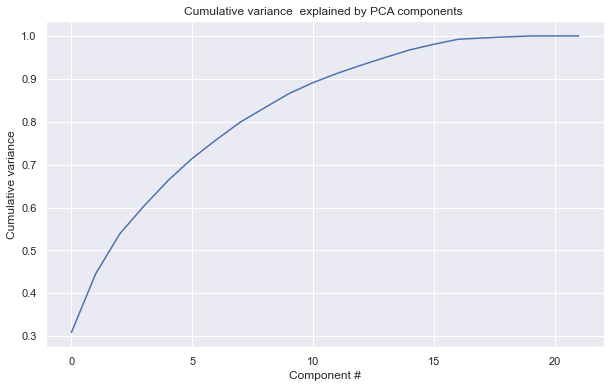

In [17]:
# line plot to visualize the cumulative explained variance  with number of components
plt.subplots(figsize=(10, 6))
plt.plot(X_train_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative variance')
plt.title('Cumulative variance  explained by PCA components ');

Note: 
The first five components seem to account for over 75% of the variance, with the first 10 components it is about 92% of the variance

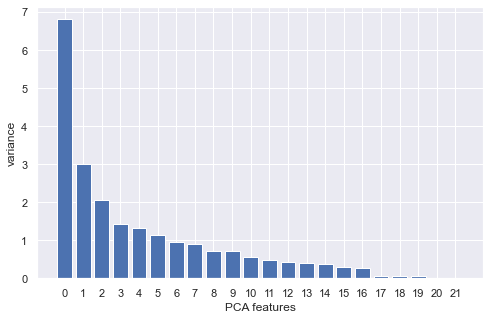

In [18]:
# Plot the explained variances
features = range(X_train_pca.n_components_)
plt.figure(figsize=(8,5))
plt.bar(features, X_train_pca.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Note: 

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

### Data quantity assessment

In [19]:
# define the pipeline wiht simple linear regression 
pipe = make_pipeline(
    IterativeImputer(), 
    StandardScaler(),
    PCA(n_components=16),
    LinearRegression()
)

In [20]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


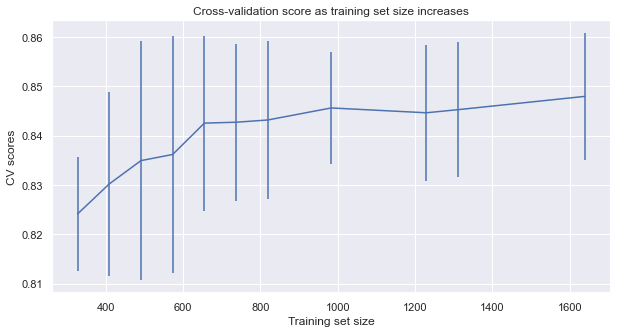

In [21]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

Note: Note: note this figure  shows that, the dataset is sufficient. the CV_score remain more or less stable after a fraction 75% of data used for training set and 25 % for Test set.

### Drop all the null value in the dataset and assess the data quantity

In [22]:
dfno_nan = df.dropna()

In [23]:
X = df.drop(columns=['Life_expectancy', 'Country'])
y = df.Life_expectancy

In [24]:
# split the dataset     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [25]:
# define the pipeline wiht simple linear regression 
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=17),
    LinearRegression()
)

In [26]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


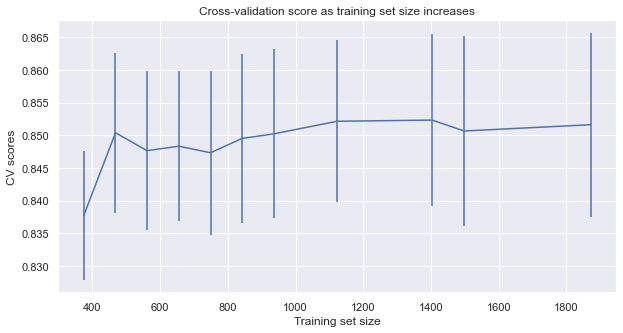

In [27]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

Note: Here, we found that Cv_score increase, reduction of the standart deviation in CV_score, 
but it remains stable after the use of 75% dataset as training and 25% for test set. 

#### Save dataset

In [28]:
#data_Zero_NAN # Raw data -- replace 0 with NaN---- delete 10 row 
datapath = '../data'
save_file(df, 'life_exp_clean_encod.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\life_exp_clean_encod.csv"
